#### This script contains the following:
    
1. Importing libraries and data

2. Data cleaning

3. Data Merging 

3. Data prep for regression analysis

4. Regression analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Setting Path
path= r'/Users/pierremora/Desktop/LinkedIn Job Postings 2023'

In [5]:
# Importing dataframe
jobs_link1= pd.read_csv(os.path.join(path, 'DATA', 'CLEAN DATA', 'merged_job_company_industry.csv'))

In [6]:
# Importing dataframe
employees= pd.read_csv(os.path.join(path, 'DATA', 'RAW DATA', 'employee_counts.csv'))

In [8]:
# data cleanning for new dataset
employees.head()

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,1.692645e+09
1,10033339,3,187,1.692645e+09
2,6049228,20,82,1.692645e+09
3,2641066,45,2336,1.692645e+09
4,96649998,0,2,1.692645e+09


In [9]:
# counting missing values
missing_values = employees.isnull().sum()

In [10]:
# Calculating the percentage of missing values
missing_percentage = (missing_values / len(employees)) * 100

In [11]:
# Combining  the results and sort by percentage:
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

In [12]:
# checking results
print(missing_data[missing_data['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


### No missing values

In [13]:
# Identifying fully duplicated rows
full_duplicates = employees[employees.duplicated()]

# Counting the number of fully duplicated rows
num_full_duplicates = len(full_duplicates)
print(f"Number of fully duplicated rows: {num_full_duplicates}")

Number of fully duplicated rows: 3356


In [14]:
employees.shape

(15907, 4)

In [15]:


# Check the number of rows before and after removing duplicates
num_rows_before = employees.shape[0]
num_rows_after = employee_counts_deduplicated.shape[0]
num_duplicates_removed = num_rows_before - num_rows_after

num_rows_before, num_rows_after, num_duplicates_removed


(15907, 12551, 3356)

In [16]:
employee_counts_deduplicated.shape

(12551, 4)

In [18]:

# Merge the original dataset with the new dataset on 'company_id'
merged_jobs_link = pd.merge(jobs_link1, employee_counts_deduplicated, on='company_id', how='left')

# Check the first few rows of the merged dataset
merged_jobs_link.head()


,Unnamed: 0,job_id,company_id,title,description,max_salary,min_salary,pay_period,formatted_work_type,applies,...,job_location_state,industry,company_name,company_size,company_location_city,company_location_country,company_location_state,employee_count,follower_count,time_recorded
0,0,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,Full-time,NaN,...,California,Transportation/Trucking/Railroad,CargoLogin.,1.0,Santa Clarita,United States,California,15,159,1.692835e+09
1,1,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,Contract,1.0,...,New York,Staffing & Recruiting,Employvision Inc.,1.0,Somerset,United States,New Jersey,48,14476,1.692772e+09
2,2,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,Full-time,NaN,...,Texas,Religious Institutions,First Baptist Church Forney,2.0,Forney,United States,Texas,0,0,1.692832e+09
3,3,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,Full-time,NaN,...,New York,Design,Ken Fulk Inc,1.0,San Francisco,United States,California,87,9790,1.692868e+09
4,4,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,37000.0,YEARLY,Full-time,5.0,...,Georgia,Retail,Sunnyland Farms,2.0,Albany,United States,Georgia,40,563,1.692772e+09


In [27]:
# Calculating the number of missing values in the 'views' column
missing_values_views = merged_jobs_link['views'].isna().sum()

# Calculate the total number of values in the 'views' column
total_values_views = merged_jobs_link.shape[0]

# Calculate the percentage of missing values
percentage_missing_views = (missing_values_views / total_values_views) * 100

print(f"Missing values in 'views': {missing_values_views}")
print(f"Total values in 'views': {total_values_views}")
print(f"Percentage of missing values in 'views': {percentage_missing_views:.2f}%")


Missing values in 'views': 22255
Total values in 'views': 123727
Percentage of missing values in 'views': 17.99%


#### Note: Subset Analysis needed, If the missing data is not random and imputation is not suitable, we could analyze the subset of data with complete cases. However, this may not be representative of the overall population.

In [31]:
# creating a subset data
data_jobs_link_non_missing_views = merged_jobs_link.dropna(subset=['views'])

### Analyzing correlation between views and follower_counts
#### Popular companies might get more views on their job postings simply due to brand recognition.

In [32]:
#checking data types
print(data_jobs_link_non_missing_views['views'].dtype)
print(data_jobs_link_non_missing_views['follower_count'].dtype)


float64
int64


In [33]:
print(data_jobs_link_non_missing_views['views'].describe())
print(data_jobs_link_non_missing_views['follower_count'].describe())


count    101472.000000
mean         45.420254
std          88.072326
min           1.000000
25%           5.000000
50%          15.000000
75%          47.000000
max        1549.000000
Name: views, dtype: float64
count    1.014720e+05
mean     3.898748e+06
std      9.367818e+06
min      0.000000e+00
25%      2.845000e+04
50%      2.655440e+05
75%      1.712204e+06
max      3.189121e+07
Name: follower_count, dtype: float64


### 3. Data preparation for regression analysis

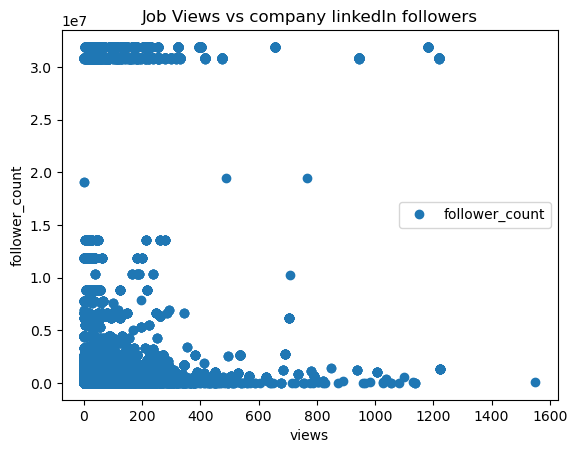

In [34]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

data_jobs_link_non_missing_views.plot(x = 'views', y='follower_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Job Views vs company linkedIn followers')  
plt.xlabel('views')  
plt.ylabel('follower_count')  
plt.show()


In [35]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = data_jobs_link_non_missing_views['views'].values.reshape(-1,1)
y = data_jobs_link_non_missing_views['follower_count'].values.reshape(-1,1)

In [36]:
X

array([[17.],
       [ 2.],
       [49.],
       ...,
       [ 3.],
       [10.],
       [31.]])

In [37]:
y

array([[14476],
       [ 9790],
       [  563],
       ...,
       [13632],
       [58204],
       [ 2982]])

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 82413672781559.62
R^2: 0.07465860481334241


A Mean Squared Error (MSE) of approximately 
8.24
×
1
0
13
8.24×10 
13
 . The MSE is very large, which suggests that the model's predictions are quite far off from the actual values. This could be due to the scale of the views variable, even after log transformation, or it could indicate that the model is not a good fit for the data.
An 
R
2
R 
2
  score of approximately 0.075. This value indicates that only about 7.5% of the variance in the views variable is explained by the follower_count. This is a low value, implying that follower_count alone is not a strong predictor of views.

### Exploring the relationship between applies and views

In [41]:
# Removing rows with missing values in 'applies' and 'views'
jobs_views_clean = merged_jobs_link.dropna(subset=['applies', 'views'])


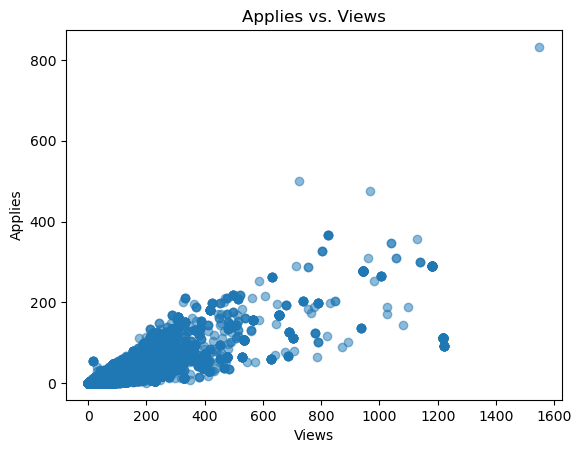

In [42]:
# Scatter plot to visualize the relationship
plt.scatter(jobs_views_clean['views'], jobs_views_clean['applies'], alpha=0.5)
plt.title('Applies vs. Views')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.show()


 ####  Note: The outlier in our dataset is a real value and not due to any error, however  we need to evaluate how much the outlier will influence our analysis. If it has a significant effect on the regression line or summary statistics, we might consider using methods robust to outliers.

#### 4. Regression analysis

In [49]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = jobs_views_clean['views'].values.reshape(-1,1)
y = jobs_views_clean['applies'].values.reshape(-1,1)

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 193.7217083994335
R^2: 0.7100792352864955


#### NOTES: 
###### The Mean Squared Error (MSE) is now 193.72, which is much lower than the previous value. A lower MSE indicates that the model's predictions are closer to the actual data points.
##### The R2 value is approximately 0.71, meaning that around 71% of the variance in the applies is explained by the views. This is a substantial improvement and suggests that the model has a good fit for the data.

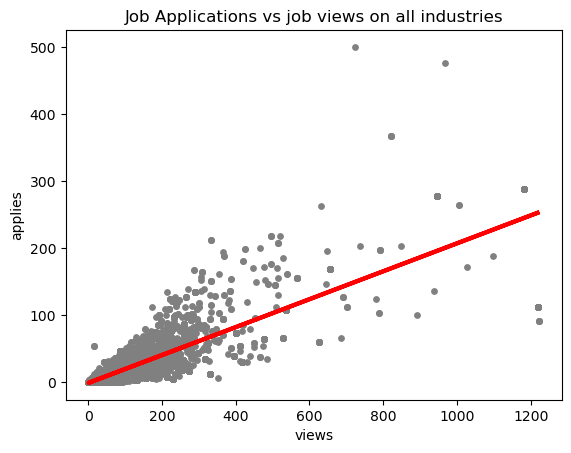

In [52]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Job Applications vs job views on all industries')
plot_test.xlabel('views')
plot_test.ylabel('applies')
plot_test.show()

In [54]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data1.head(30)

,Actual,Predicted
0,71.0,53.268327
1,3.0,18.699592
2,1.0,1.623469
3,21.0,22.656254
4,2.0,12.035739
5,1.0,-0.458985
6,67.0,39.940622
7,59.0,48.478683
8,38.0,33.068524
9,2.0,1.623469


In [60]:
#exporting dataframe to csv.

merged_jobs_link.to_csv(os.path.join(path, 'DATA','CLEAN DATA', 'merged_jobs_link.csv'))

### Exploring the relationship between applies and views (IT industry)

In [65]:
# Filter the DataFrame
filtered_jobs_link = merged_jobs_link[
    (merged_jobs_link['industry'] == 'Information Technology & Services') & 
    merged_jobs_link['applies'].notnull() & 
    merged_jobs_link['views'].notnull()
]



In [66]:
filtered_jobs_link.head()

,Unnamed: 0,job_id,company_id,title,description,max_salary,min_salary,pay_period,formatted_work_type,applies,...,job_location_state,industry,company_name,company_size,company_location_city,company_location_country,company_location_state,employee_count,follower_count,time_recorded
143,39,3497509795,10033339.0,Senior Programmer/Analyst,Job descriptioni5 Technology Group is seeking ...,NaN,NaN,NaN,Full-time,2.0,...,Maryland,Information Technology & Services,NaN,NaN,NaN,NaN,NaN,3,187,1.692645e+09
179,64,3655655364,82884837.0,POWER BI,Hi Everyone....!Job Description:Job Title: Sr ...,NaN,NaN,NaN,Contract,52.0,...,Texas,Information Technology & Services,COD CORES,2.0,Farmers Branch,United States,Texas,45,6539,1.692773e+09
184,69,3673294109,750072.0,Quality Analyst,\nTitle: Quality Technician Client :- Cyient L...,60000.0,50000.0,YEARLY,Full-time,7.0,...,California,Information Technology & Services,E-Solutions,5.0,San Jose,United States,California,1471,157212,1.692773e+09
185,69,3673294109,750072.0,Quality Analyst,\nTitle: Quality Technician Client :- Cyient L...,60000.0,50000.0,YEARLY,Full-time,7.0,...,California,Information Technology & Services,E-Solutions,5.0,San Jose,United States,California,1471,157427,1.692818e+09
186,69,3673294109,750072.0,Quality Analyst,\nTitle: Quality Technician Client :- Cyient L...,60000.0,50000.0,YEARLY,Full-time,7.0,...,California,Information Technology & Services,E-Solutions,5.0,San Jose,United States,California,1471,157541,1.692831e+09


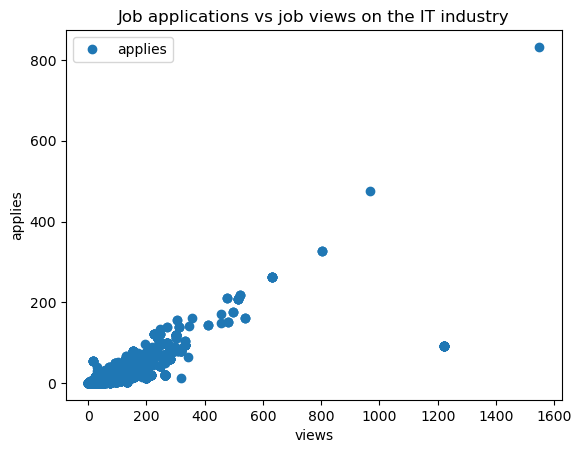

In [67]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

filtered_jobs_link.plot(x = 'views', y='applies',style='o') 
plt.title('Job applications vs job views on the IT industry')  
plt.xlabel('views')  
plt.ylabel('applies')  
plt.show()

In [68]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = filtered_jobs_link['views'].values.reshape(-1,1)
y = filtered_jobs_link['applies'].values.reshape(-1,1)

In [69]:
# Splitting  data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Ready for regression analysis

In [70]:
# Create a regression object.

regression = LinearRegression()

In [71]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predicting the values of y using X.

y_pred = regression.predict(X_test)

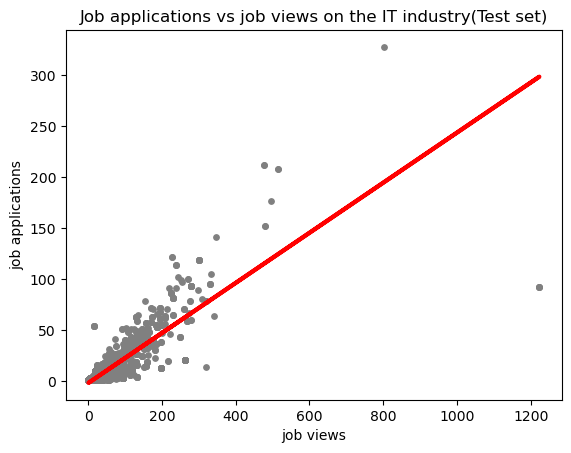

In [73]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Job applications vs job views on the IT industry(Test set)')
plot_test.xlabel('job views')
plot_test.ylabel('job applications')
plot_test.show()

In [75]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

In [76]:
# Printing the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2460281]]
Mean squared error:  221.19499850595992
R2 score:  0.5958244629446028


In [78]:
# Create a dataframe comparing the actual and predicted values of y.

data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data2.head(30)

,Actual,Predicted
0,21.0,62.617722
1,3.0,0.372611
2,13.0,17.102522
3,1.0,0.126583
4,32.0,27.681731
5,4.0,2.340836
6,19.0,29.649956
7,27.0,28.911871
8,55.0,46.625895
9,5.0,3.817005


In [79]:
# Predicting. X train

y_pred_train = regression.predict(X_train)

In [80]:
rmse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2460281]]
Mean squared error:  305.3440465788582
R2 score:  0.6377278200696048


#### Notes 
R-squared (R2) Score: The R2 score of approximately 0.638 indicates that about 63.8% of the variability in the number of applications can be explained by the number of views.

The slope of the regression line is approximately 0.246. This means that for each additional view, we can expect on average a 0.246 increase in the number of applications. This is a positive relationship indicating that as the number of views increases, so does the number of applications.

### Exploring the relationship between applies and views (top 4 other industries combined base on job offers)

In [85]:
# Defining the list of top 4 industries (not it)
selected_industries = [
    'Staffing & Recruiting', 
    'Hospital & Health Care', 
    'Retail', 
    'Computer Software'
]

# Filter the DataFrame
no_it_jobs = merged_jobs_link[
    (merged_jobs_link['industry'].isin(selected_industries)) & 
    merged_jobs_link['applies'].notnull() & 
    merged_jobs_link['views'].notnull()
]



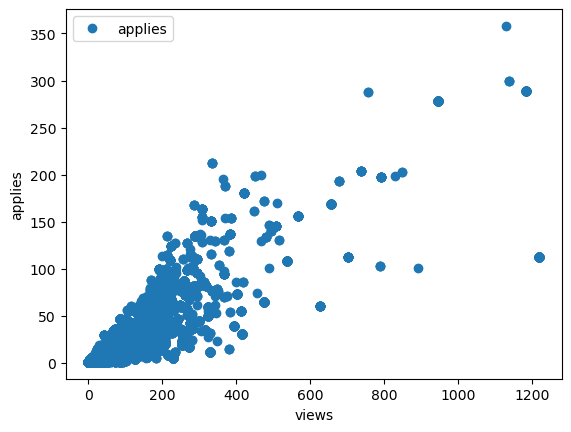

In [86]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

no_it_jobs.plot(x = 'views', y='applies',style='o') 
plt.xlabel('views')  
plt.ylabel('applies')  
plt.show()

In [87]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = no_it_jobs['views'].values.reshape(-1,1)
y = no_it_jobs['applies'].values.reshape(-1,1)

In [88]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Ready for regression analysis

In [89]:
# Creating a regression object.

regression = LinearRegression()  

In [90]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [91]:
# Predict the values of y using X.

y_pred = regression.predict(X_test)

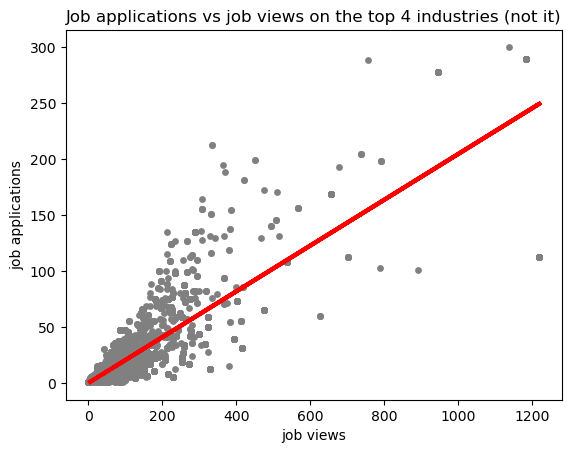

In [92]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_pred, color='red', linewidth =3)
plot_test.title('Job applications vs job views on the top 4 industries (not it)')
plot_test.xlabel('job views')
plot_test.ylabel('job applications')
plot_test.show()

In [94]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

In [95]:
# Printing the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20468508]]
Mean squared error:  260.1176562973674
R2 score:  0.7043620396545711


In [96]:
# Create a dataframe comparing the actual and predicted values of y.

data3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data3.head(30)

,Actual,Predicted
0,23.0,14.886720
1,27.0,17.138256
2,75.0,44.156686
3,23.0,20.822587
4,3.0,1.172819
5,10.0,8.336797
6,13.0,9.360223
7,3.0,7.108687
8,7.0,6.085261
9,12.0,4.857151


### Comparing how regression affected the trainning set

In [97]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [98]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [99]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20468508]]
Mean squared error:  264.0479397548099
R2 score:  0.705132543918074


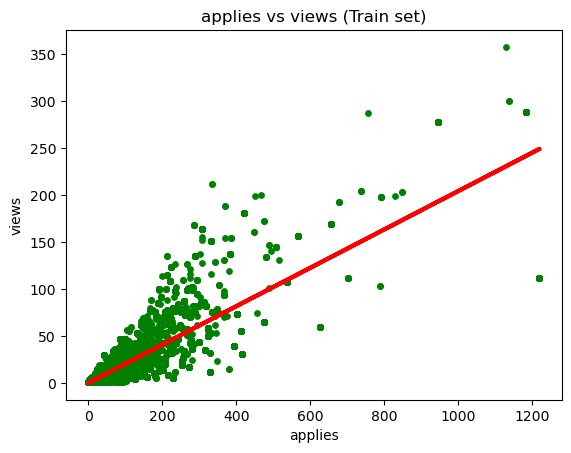

In [101]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('applies vs views (Train set)')
plot_test.xlabel('applies')
plot_test.ylabel('views')
plot_test.show()

#### Notes: 

Slope: The slope of the regression line is approximately 0.205. This indicates that for each additional view, there is an average increase of 0.205 in the number of applications

R-squared (R2) Score: The R2 score has increased to approximately 0.705

The MSE has decreased to 264.048 

### Comparisson between Relationship between job applications and job views on (Staffing & Recruiting, Retail,Hospital & Healthcare, and Computer software (combined)) and IT jobs applications and job views:

Slope:

IT Industry: 0.246

Combined Industries: 0.205

##### The slope for the IT industry is higher, which indicates that the number of applications increases more per view in this industry than in the combined industries. This suggests that job listings in the IT industry might be more effective at converting views into applications.

Mean Squared Error (MSE):

IT Industry: 305.344

Combined Industries: 264.048

##### The MSE is lower for the combined industries, which suggests that the predictions for the number of applications based on the number of views are closer to the actual numbers when compared to the IT industry. A lower MSE indicates a better fit of the model to the data, so the model for the combined industries may be more accurate.

R-squared (R2) Score:

IT Industry: 0.638

Combined Industries: 0.705

##### The R2 score is higher for the combined industries, meaning that the model explains a greater proportion of the variance in the number of applications. This implies that job views are a stronger predictor of job applications in the combined industries than in the IT industry alone.

Overall Conclusion:

The model for the combined industries seems to have a better fit than the model for the IT industry alone. This is based on both a lower MSE and a higher R2 score.
Job views in the IT industry are associated with a higher increase in job applications (higher slope), but the model is less predictive overall (lower R2 score) compared to the combined industries.
These results could suggest that while job listings in the IT industry might attract more applications per view, the behavior of job seekers in the combined industries is more consistent or homogeneous, leading to a model that can predict applications more accurately.